# Predict Rain on a given Day

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

for directory,_,filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(directory,filename))

./data/astro_data.csv
./data/location_data.csv


In [20]:
adata = pd.read_csv('./data/astro_data.csv')
ldata = pd.read_csv('./data/location_data.csv')
fdata = pd.read_csv('./data/forecast_data.csv')

In [11]:
adata.head(2)

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state,city
0,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati
1,05:50 AM,05:35 PM,02:24 PM,01:00 AM,First Quarter,61,Andhra Pradesh,Visakhapatnam


In [12]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sunrise            1232 non-null   object
 1   sunset             1232 non-null   object
 2   moonrise           1232 non-null   object
 3   moonset            1232 non-null   object
 4   moon_phase         1232 non-null   object
 5   moon_illumination  1232 non-null   int64 
 6   state              1232 non-null   object
 7   city               1232 non-null   object
dtypes: int64(1), object(7)
memory usage: 77.1+ KB


In [13]:
adata.describe()

,moon_illumination
count,1232.000000
mean,82.875000
std,12.835229
min,61.000000
25%,74.000000
50%,85.500000
75%,91.750000
max,100.000000


In [17]:
adata.state.nunique()

28

In [18]:
adata.city.nunique()

151

In [36]:
ldata = ldata.rename({'name':'city'},axis=1)

In [14]:
ldata.head(2)

,name,region,country,lat,lon,tz_id,localtime_epoch,localtime
0,Amaravati,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903533,2021-10-22 17:22
1,Visakhapatnam,Andhra Pradesh,India,17.70,83.30,Asia/Kolkata,1634903543,2021-10-22 17:22


In [15]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1232 non-null   object 
 1   region           1200 non-null   object 
 2   country          1232 non-null   object 
 3   lat              1232 non-null   float64
 4   lon              1232 non-null   float64
 5   tz_id            1232 non-null   object 
 6   localtime_epoch  1232 non-null   int64  
 7   localtime        1232 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 77.1+ KB


In [19]:
ldata.describe()

,lat,lon,localtime_epoch
count,1232.000000,1232.000000,1.232000e+03
mean,22.854789,81.412849,1.634910e+09
std,5.647592,15.116780,3.908123e+03
min,8.510000,-78.910000,1.634904e+09
25%,19.670000,76.230000,1.634907e+09
50%,23.790000,79.970000,1.634910e+09
75%,27.030000,88.350000,1.634914e+09
max,32.580000,123.580000,1.634917e+09


In [21]:
fdata.head(2)

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,1634236200,2021-10-15 00:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,...,0,0,0,0,10.0,6.0,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,2021-10-15 01:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,...,0,0,0,0,10.0,6.0,8.6,13.9,Andhra Pradesh,Amaravati


In [26]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      29568 non-null  int64  
 1   time            29568 non-null  object 
 2   temp_c          29568 non-null  float64
 3   temp_f          29568 non-null  float64
 4   is_day          29568 non-null  int64  
 5   condition       29568 non-null  object 
 6   wind_mph        29568 non-null  float64
 7   wind_kph        29568 non-null  float64
 8   wind_degree     29568 non-null  int64  
 9   wind_dir        29568 non-null  object 
 10  pressure_mb     29568 non-null  float64
 11  pressure_in     29568 non-null  float64
 12  precip_mm       29568 non-null  float64
 13  precip_in       29568 non-null  float64
 14  humidity        29568 non-null  int64  
 15  cloud           29568 non-null  int64  
 16  feelslike_c     29568 non-null  float64
 17  feelslike_f     29568 non-null 

In [28]:
data = adata.merge(fdata,on='city')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245760 entries, 0 to 245759
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sunrise            245760 non-null  object 
 1   sunset             245760 non-null  object 
 2   moonrise           245760 non-null  object 
 3   moonset            245760 non-null  object 
 4   moon_phase         245760 non-null  object 
 5   moon_illumination  245760 non-null  int64  
 6   state_x            245760 non-null  object 
 7   city               245760 non-null  object 
 8   time_epoch         245760 non-null  int64  
 9   time               245760 non-null  object 
 10  temp_c             245760 non-null  float64
 11  temp_f             245760 non-null  float64
 12  is_day             245760 non-null  int64  
 13  condition          245760 non-null  object 
 14  wind_mph           245760 non-null  float64
 15  wind_kph           245760 non-null  float64
 16  wi

In [44]:
data = data.merge(ldata,on='city')

In [46]:
data.isna().sum() > 0

sunrise              False
sunset               False
moonrise             False
moonset              False
moon_phase           False
moon_illumination    False
state_x              False
city                 False
time_epoch           False
time                 False
temp_c               False
temp_f               False
is_day               False
condition            False
wind_mph             False
wind_kph             False
wind_degree          False
wind_dir             False
pressure_mb          False
pressure_in          False
precip_mm            False
precip_in            False
humidity             False
cloud                False
feelslike_c          False
feelslike_f          False
windchill_c          False
windchill_f          False
heatindex_c          False
heatindex_f          False
dewpoint_c           False
dewpoint_f           False
will_it_rain         False
chance_of_rain       False
will_it_snow         False
chance_of_snow       False
vis_km               False
v

In [49]:
data.corr()

,moon_illumination,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,lat,lon,localtime_epoch
moon_illumination,1.000000e+00,3.040709e-13,1.838736e-14,1.604478e-14,1.681221e-15,-2.863963e-14,-2.916752e-14,-2.029234e-14,-4.577050e-14,-2.595144e-14,...,8.316402e-15,NaN,NaN,-1.987035e-15,-3.761183e-15,-3.638878e-14,-3.622792e-14,-3.655754e-14,3.833902e-14,-5.407930e-12
time_epoch,3.040709e-13,1.000000e+00,-1.234679e-01,-1.234465e-01,1.625417e-03,8.204998e-02,8.205086e-02,2.785447e-01,6.926845e-01,6.944328e-01,...,1.440589e-02,NaN,NaN,-8.823720e-02,-8.484969e-02,6.625625e-02,6.619445e-02,4.217403e-04,-1.824310e-03,2.721414e-04
temp_c,1.838736e-14,-1.234679e-01,1.000000e+00,9.999839e-01,4.635257e-01,2.716235e-01,2.714981e-01,1.263637e-01,-4.513620e-01,-4.528768e-01,...,-1.435631e-01,NaN,NaN,2.739572e-01,2.807140e-01,5.922237e-02,5.904837e-02,-1.390172e-01,-2.078937e-01,-4.581053e-02
temp_f,1.604478e-14,-1.234465e-01,9.999839e-01,1.000000e+00,4.635744e-01,2.716295e-01,2.715029e-01,1.263641e-01,-4.513415e-01,-4.528637e-01,...,-1.435367e-01,NaN,NaN,2.739126e-01,2.806642e-01,5.921627e-02,5.904279e-02,-1.390179e-01,-2.078444e-01,-4.580679e-02
is_day,1.681221e-15,1.625417e-03,4.635257e-01,4.635744e-01,1.000000e+00,1.927817e-01,1.928071e-01,8.289333e-02,-3.037680e-02,-3.059335e-02,...,1.060365e-02,NaN,NaN,1.152586e-01,1.102462e-01,-9.249644e-02,-9.263817e-02,-1.628096e-02,-1.606830e-03,-6.251007e-03
wind_mph,-2.863963e-14,8.204998e-02,2.716235e-01,2.716295e-01,1.927817e-01,1.000000e+00,9.999287e-01,1.452120e-01,-9.088343e-02,-9.202801e-02,...,-2.595127e-02,NaN,NaN,1.224860e-01,1.234600e-01,9.036276e-01,9.035306e-01,-8.537688e-02,-2.226350e-01,7.168072e-02
wind_kph,-2.916752e-14,8.205086e-02,2.714981e-01,2.715029e-01,1.928071e-01,9.999287e-01,1.000000e+00,1.452386e-01,-9.076649e-02,-9.191234e-02,...,-2.589364e-02,NaN,NaN,1.223135e-01,1.232844e-01,9.036434e-01,9.035459e-01,-8.541396e-02,-2.225781e-01,7.171652e-02
wind_degree,-2.029234e-14,2.785447e-01,1.263637e-01,1.263641e-01,8.289333e-02,1.452120e-01,1.452386e-01,1.000000e+00,1.414623e-01,1.421718e-01,...,-6.336431e-02,NaN,NaN,5.444086e-02,6.062188e-02,1.096095e-01,1.095373e-01,-1.747932e-01,-1.855287e-01,3.478209e-02
pressure_mb,-4.577050e-14,6.926845e-01,-4.513620e-01,-4.513415e-01,-3.037680e-02,-9.088343e-02,-9.076649e-02,1.414623e-01,1.000000e+00,9.954644e-01,...,-2.986404e-02,NaN,NaN,-1.197532e-01,-1.165227e-01,-8.247215e-02,-8.247877e-02,6.588574e-02,1.106162e-01,1.518386e-02
pressure_in,-2.595144e-14,6.944328e-01,-4.528768e-01,-4.528637e-01,-3.059335e-02,-9.202801e-02,-9.191234e-02,1.421718e-01,9.954644e-01,1.000000e+00,...,-2.763937e-02,NaN,NaN,-1.205989e-01,-1.174694e-01,-8.381399e-02,-8.382483e-02,6.626652e-02,1.110636e-01,1.495568e-02


In [51]:
data = data.dropna()

<AxesSubplot:>

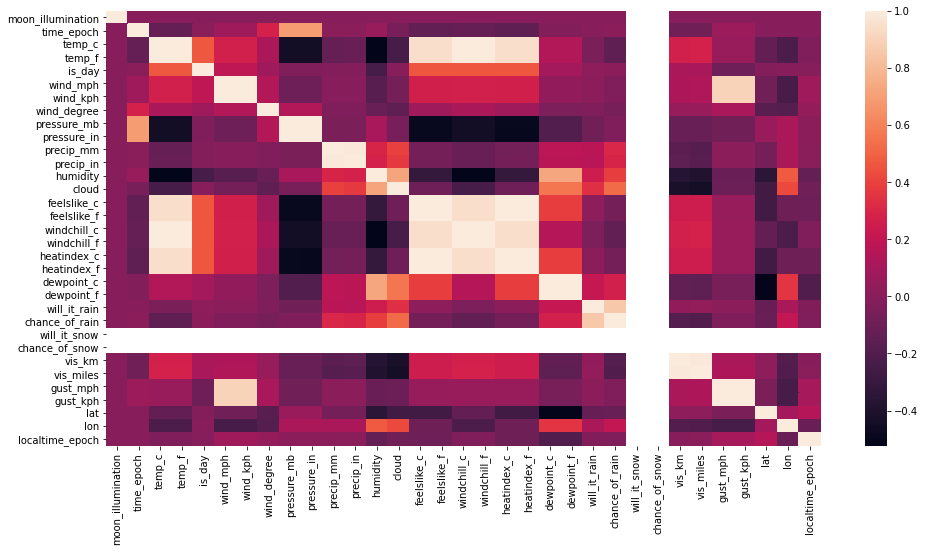

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr())

In [58]:
data['will_it_rain'].unique()

array([0, 1])

In [60]:
data['chance_of_snow'].unique()

array([0])

In [61]:
data.drop(['will_it_snow','chance_of_snow'],1,inplace=True)

In [64]:
data['chance_of_rain'].unique()

array([ 0,  1, 63, 80, 81, 21, 10,  3,  2, 29, 60, 50, 51, 61, 94, 85, 93,
       45, 62, 65, 91])

In [65]:
data['will_it_rain'].unique()

array([0, 1])

In [69]:
df_num = [x for x in data.columns if data[x].dtype != 'O']
df_num = data[df_num]
df_num.head(2)

,moon_illumination,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,dewpoint_f,will_it_rain,chance_of_rain,vis_km,vis_miles,gust_mph,gust_kph,lat,lon,localtime_epoch
0,61,1634236200,23.2,73.8,0,4.3,6.8,41,1006.0,29.69,...,62.1,0,0,10.0,6.0,8.9,14.4,20.93,77.75,1634903533
1,61,1634236200,23.2,73.8,0,4.3,6.8,41,1006.0,29.69,...,62.1,0,0,10.0,6.0,8.9,14.4,20.93,77.75,1634903586


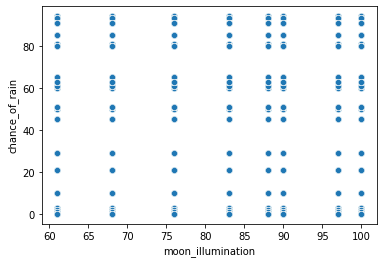

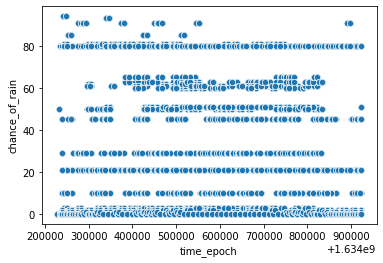

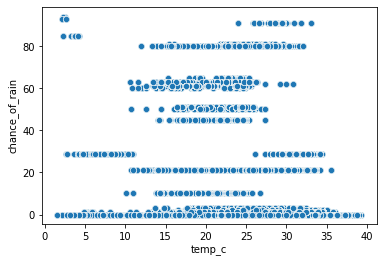

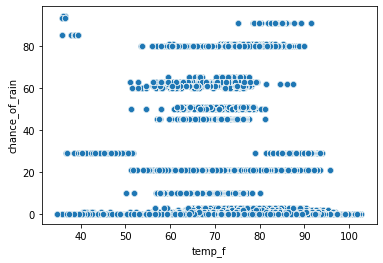

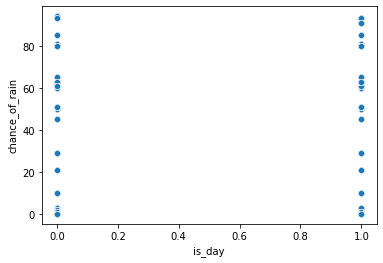

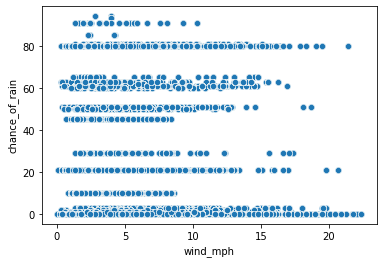

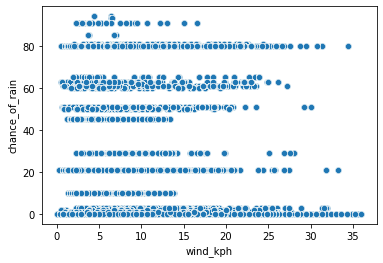

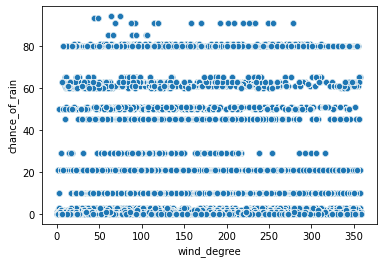

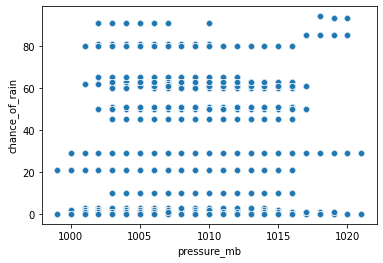

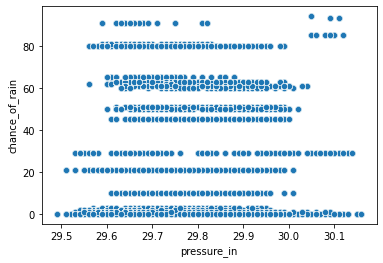

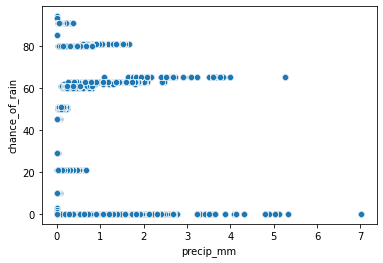

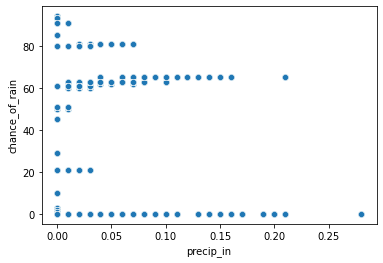

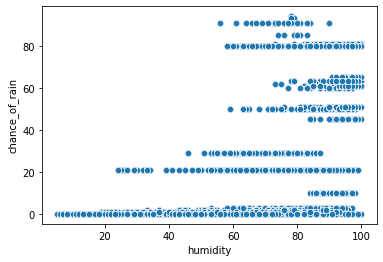

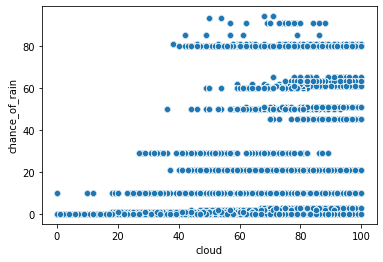

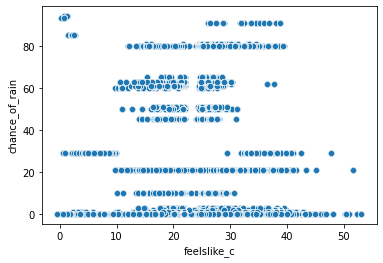

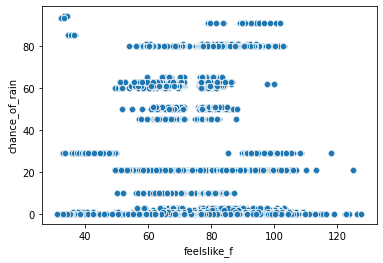

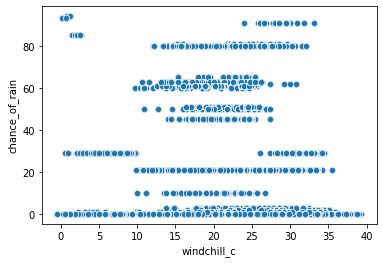

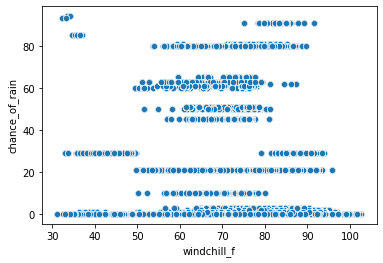

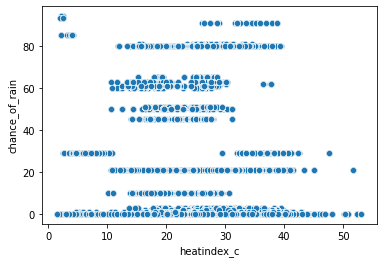

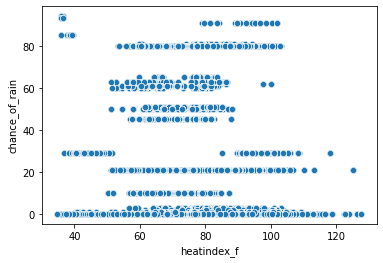

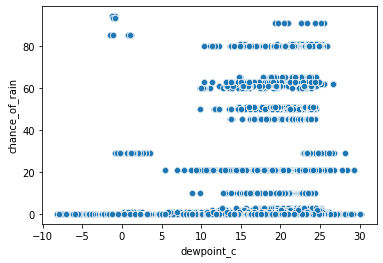

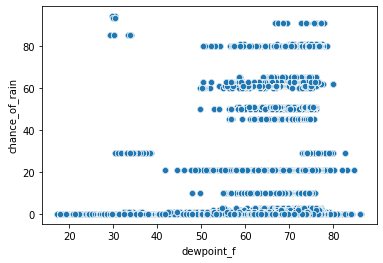

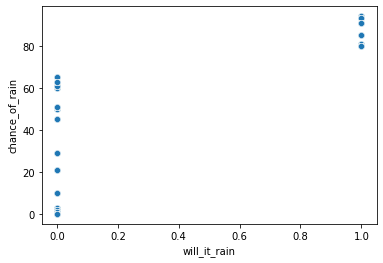

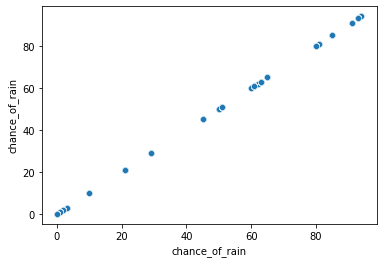

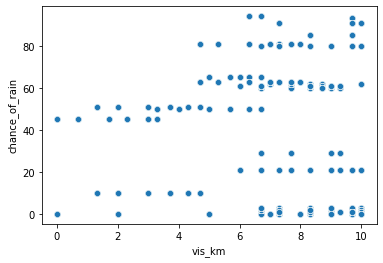

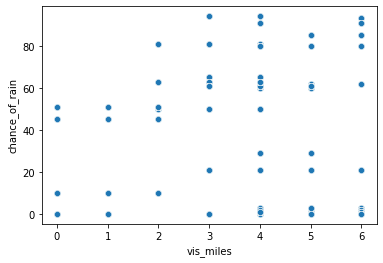

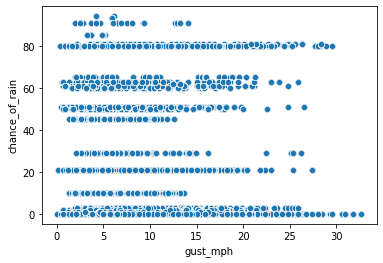

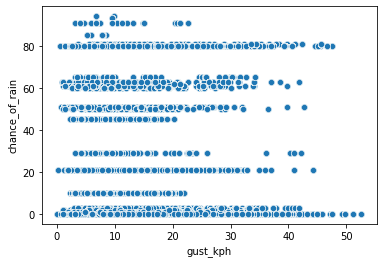

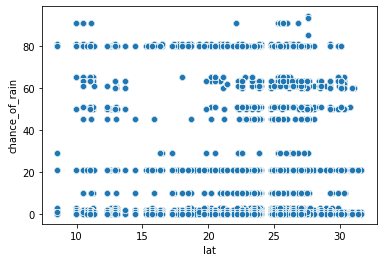

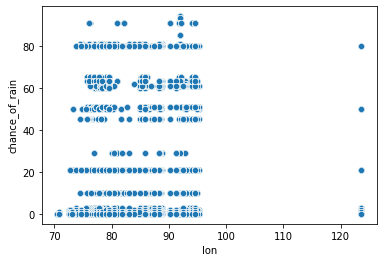

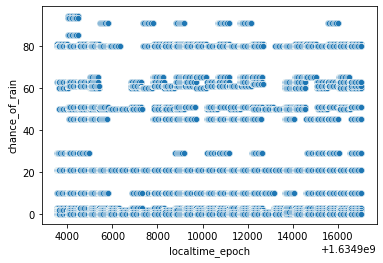

In [72]:
`1

In [73]:
df_num.columns

Index(['moon_illumination', 'time_epoch', 'temp_c', 'temp_f', 'is_day',
       'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feelslike_c',
       'feelslike_f', 'windchill_c', 'windchill_f', 'heatindex_c',
       'heatindex_f', 'dewpoint_c', 'dewpoint_f', 'will_it_rain',
       'chance_of_rain', 'vis_km', 'vis_miles', 'gust_mph', 'gust_kph', 'lat',
       'lon', 'localtime_epoch'],
      dtype='object')

In [74]:
[x for x in df_num.columns if '_f' in x]

['temp_f', 'feelslike_f', 'windchill_f', 'heatindex_f', 'dewpoint_f']

In [75]:
[x for x in df_num.columns if '_in' in x]

['pressure_in', 'precip_in']

In [76]:
[x for x in df_num.columns if '_km' in x]

['vis_km']

In [77]:
drop_cols = ['temp_f', 'feelslike_f', 'windchill_f', 'heatindex_f', 
             'dewpoint_f','pressure_in', 'precip_in','vis_km','gust_kph','time_epoch','localtime_epoch']


In [78]:
df_num.drop(drop_cols,1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
data.drop(drop_cols,1,inplace=True)

In [80]:
data

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state_x,city,time_epoch,time,...,gust_mph,gust_kph,state_y,region,country,lat,lon,tz_id,localtime_epoch,localtime
0,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,1634236200,2021-10-15 00:00,...,8.9,14.4,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903533,2021-10-22 17:22
1,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,1634236200,2021-10-15 00:00,...,8.9,14.4,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903586,2021-10-22 17:23
2,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,1634236200,2021-10-15 00:00,...,8.9,14.4,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903648,2021-10-22 17:24
3,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,1634236200,2021-10-15 00:00,...,8.9,14.4,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903710,2021-10-22 17:25
4,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,1634236200,2021-10-15 00:00,...,8.9,14.4,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,1634903771,2021-10-22 17:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039803,05:41 AM,05:09 PM,06:20 PM,06:55 AM,Waxing Gibbous,88,West Bengal,Durgapur,1634923800,2021-10-22 23:00,...,5.0,8.0,West Bengal,West Bengal,India,23.48,87.32,Asia/Kolkata,1634916807,2021-10-22 21:03
2039804,05:41 AM,05:09 PM,06:20 PM,06:55 AM,Waxing Gibbous,88,West Bengal,Durgapur,1634923800,2021-10-22 23:00,...,5.0,8.0,West Bengal,West Bengal,India,23.48,87.32,Asia/Kolkata,1634916869,2021-10-22 21:04
2039805,05:41 AM,05:09 PM,06:20 PM,06:55 AM,Waxing Gibbous,88,West Bengal,Durgapur,1634923800,2021-10-22 23:00,...,5.0,8.0,West Bengal,West Bengal,India,23.48,87.32,Asia/Kolkata,1634916931,2021-10-22 21:05
2039806,05:41 AM,05:09 PM,06:20 PM,06:55 AM,Waxing Gibbous,88,West Bengal,Durgapur,1634923800,2021-10-22 23:00,...,5.0,8.0,West Bengal,West Bengal,India,23.48,87.32,Asia/Kolkata,1634916993,2021-10-22 21:06


In [133]:
df_obj = [x for x in data.columns if data[x].dtype == 'O']
df_obj = data[df_obj]
df_obj

,moon_phase,state_x,city,time,condition,wind_dir,state_y,region,country,tz_id,localtime
0,First Quarter,Andhra Pradesh,Amaravati,2021-10-15 00:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",NE,Andhra Pradesh,Maharashtra,India,Asia/Kolkata,2021-10-22 17:22
1,First Quarter,Andhra Pradesh,Amaravati,2021-10-15 00:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",NE,Andhra Pradesh,Maharashtra,India,Asia/Kolkata,2021-10-22 17:23
2,First Quarter,Andhra Pradesh,Amaravati,2021-10-15 00:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",NE,Andhra Pradesh,Maharashtra,India,Asia/Kolkata,2021-10-22 17:24
3,First Quarter,Andhra Pradesh,Amaravati,2021-10-15 00:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",NE,Andhra Pradesh,Maharashtra,India,Asia/Kolkata,2021-10-22 17:25
4,First Quarter,Andhra Pradesh,Amaravati,2021-10-15 00:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",NE,Andhra Pradesh,Maharashtra,India,Asia/Kolkata,2021-10-22 17:26
...,...,...,...,...,...,...,...,...,...,...,...
2039803,Waxing Gibbous,West Bengal,Durgapur,2021-10-22 23:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",ESE,West Bengal,West Bengal,India,Asia/Kolkata,2021-10-22 21:03
2039804,Waxing Gibbous,West Bengal,Durgapur,2021-10-22 23:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",ESE,West Bengal,West Bengal,India,Asia/Kolkata,2021-10-22 21:04
2039805,Waxing Gibbous,West Bengal,Durgapur,2021-10-22 23:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",ESE,West Bengal,West Bengal,India,Asia/Kolkata,2021-10-22 21:05
2039806,Waxing Gibbous,West Bengal,Durgapur,2021-10-22 23:00,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",ESE,West Bengal,West Bengal,India,Asia/Kolkata,2021-10-22 21:06


In [134]:
for i in df_obj.columns:
    print(i,df_obj[i].nunique())

moon_phase 3
state_x 28
city 142
time 192
condition 40
wind_dir 16
state_y 28
region 29
country 2
tz_id 4
localtime 226


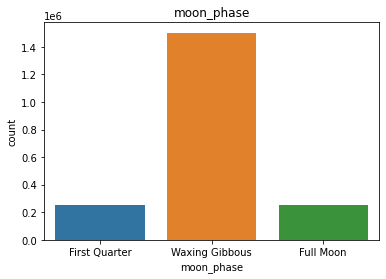

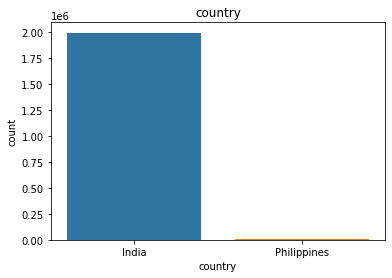

In [136]:
for x in ['moon_phase','country']:
    sns.countplot(x=x,data=df_obj)
    plt.title(x)
    plt.show()

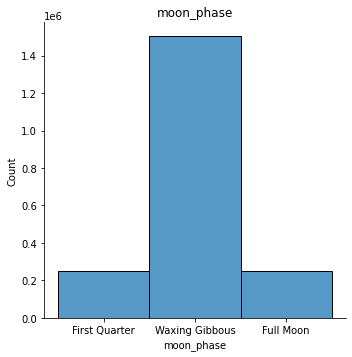

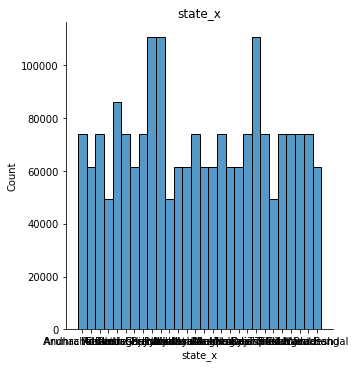

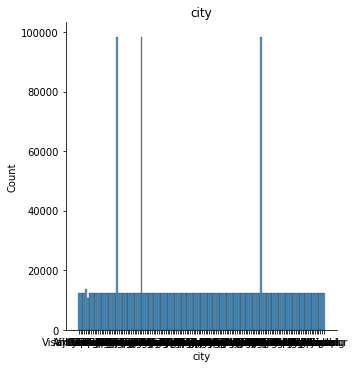

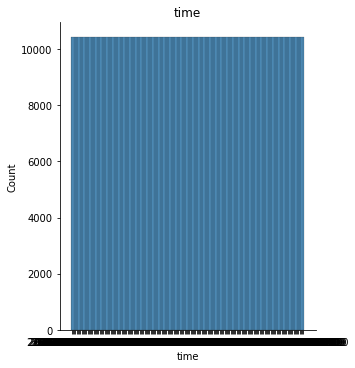

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


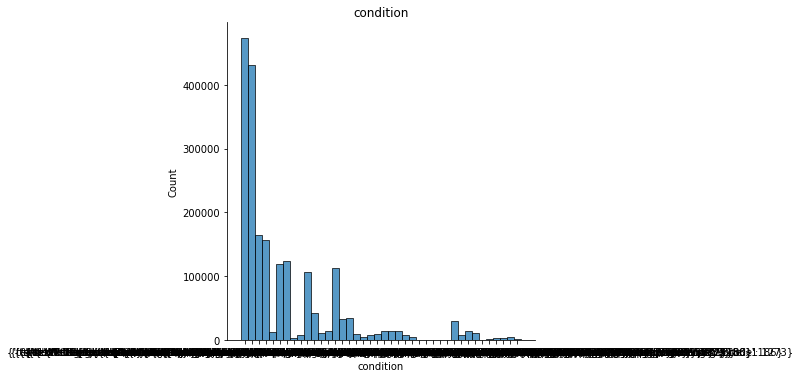

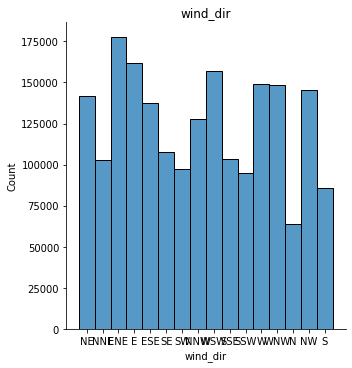

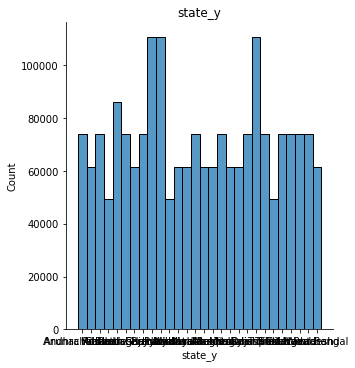

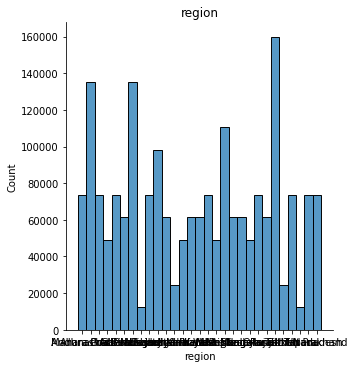

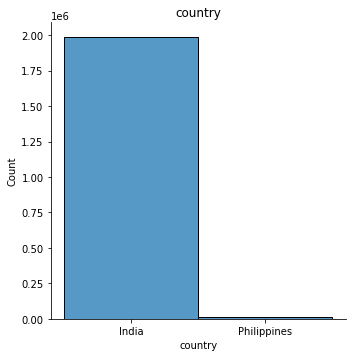

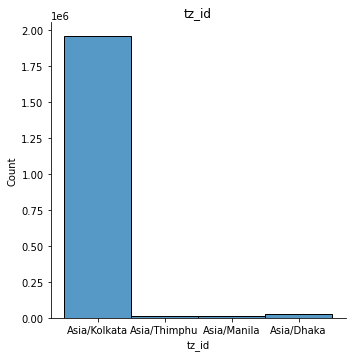

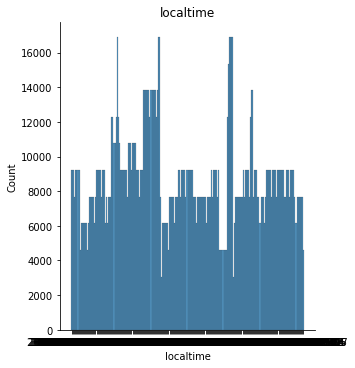

In [138]:
for x in df_obj.columns:
    sns.displot(x=x,data=df_obj)
    plt.title(x)
    plt.show()

In [140]:
df_obj.columns

Index(['moon_phase', 'state_x', 'city', 'time', 'condition', 'wind_dir',
       'state_y', 'region', 'country', 'tz_id', 'localtime'],
      dtype='object')

In [169]:
drop_cols = ['state_x', 'city','condition', 'wind_dir',
       'state_y', 'region', 'country','tz_id','time','localtime']

<AxesSubplot:xlabel='state_x', ylabel='state_y'>

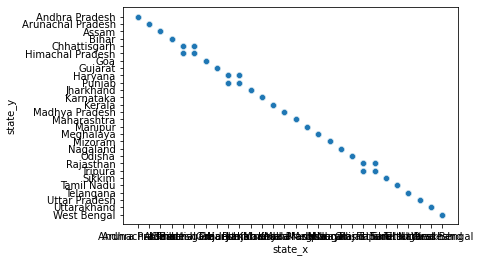

In [142]:
sns.scatterplot(x='state_x',y='state_y',data=df_obj)

In [155]:
#data[['state_x','state_y']].tail(50)

In [146]:
data.head(2)

,moon_phase,moon_illumination,state_x,city,time,temp_c,is_day,condition,wind_mph,wind_kph,...,tz_id,localtime,sunrise_hour,sunrise_minute,sunset_hour,sunset_minute,moonrise_hour,moonrise_minute,moonset_hour,moonset_minute
0,First Quarter,61,Andhra Pradesh,Amaravati,2021-10-15 00:00,23.2,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,...,Asia/Kolkata,2021-10-22 17:22,6,14,5,55,2,53,1,17
1,First Quarter,61,Andhra Pradesh,Amaravati,2021-10-15 00:00,23.2,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,...,Asia/Kolkata,2021-10-22 17:23,6,14,5,55,2,53,1,17


In [168]:
data.drop('localtime',1,inplace=True)

In [153]:
data['condition'] = data['condition'].apply(lambda x: x.split()[1])

In [154]:
data['condition'].unique()

array(["'Clear',", "'Sunny',", "'Partly", "'Moderate", "'Light",
       "'Patchy", "'Mist',", "'Overcast',", "'Cloudy',", "'Thundery",
       "'Fog',", "'Heavy"], dtype=object)

In [157]:
from sklearn.preprocessing import LabelEncoder

In [160]:
le = LabelEncoder()
data['condition'] = le.fit_transform(data['condition'])

In [170]:
data.head(2)

,moon_phase,moon_illumination,city,temp_c,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,lat,lon,sunrise_hour,sunrise_minute,sunset_hour,sunset_minute,moonrise_hour,moonrise_minute,moonset_hour,moonset_minute
0,First Quarter,61,Amaravati,23.2,0,0,4.3,6.8,41,NE,...,20.93,77.75,6,14,5,55,2,53,1,17
1,First Quarter,61,Amaravati,23.2,0,0,4.3,6.8,41,NE,...,20.93,77.75,6,14,5,55,2,53,1,17


In [171]:
data.columns

Index(['moon_phase', 'moon_illumination', 'city', 'temp_c', 'is_day',
       'condition', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_dir',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feelslike_c',
       'windchill_c', 'heatindex_c', 'dewpoint_c', 'will_it_rain',
       'chance_of_rain', 'vis_miles', 'gust_mph', 'region', 'country', 'lat',
       'lon', 'sunrise_hour', 'sunrise_minute', 'sunset_hour', 'sunset_minute',
       'moonrise_hour', 'moonrise_minute', 'moonset_hour', 'moonset_minute'],
      dtype='object')

<AxesSubplot:>

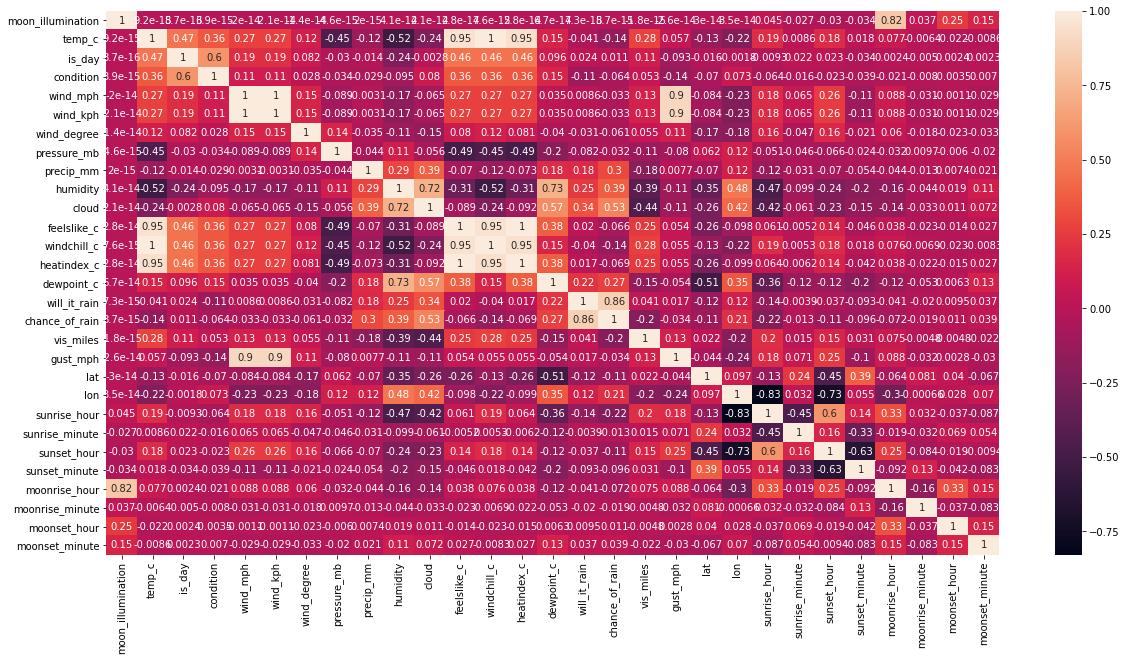

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [176]:
data.drop('chance_of_rain',1,inplace = True)

In [84]:
data['country'].unique()

array(['India', 'Philippines'], dtype=object)

In [86]:
data[data['country'] == 'Philippines']

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state_x,city,time,temp_c,...,chance_of_rain,vis_miles,gust_mph,state_y,region,country,lat,lon,tz_id,localtime
430080,05:36 AM,05:27 PM,02:00 PM,12:51 AM,First Quarter,61,Goa,Mapusa,2021-10-15 00:00,25.0,...,0,3.0,8.5,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:31
430081,05:36 AM,05:27 PM,02:00 PM,12:51 AM,First Quarter,61,Goa,Mapusa,2021-10-15 00:00,25.0,...,0,3.0,8.5,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:32
430082,05:36 AM,05:27 PM,02:00 PM,12:51 AM,First Quarter,61,Goa,Mapusa,2021-10-15 00:00,25.0,...,0,3.0,8.5,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:33
430083,05:36 AM,05:27 PM,02:00 PM,12:51 AM,First Quarter,61,Goa,Mapusa,2021-10-15 00:00,25.0,...,0,3.0,8.5,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:34
430084,05:36 AM,05:27 PM,02:00 PM,12:51 AM,First Quarter,61,Goa,Mapusa,2021-10-15 00:00,25.0,...,0,3.0,8.5,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442363,05:37 AM,05:24 PM,06:36 PM,06:42 AM,Waxing Gibbous,88,Goa,Mapusa,2021-10-22 23:00,25.7,...,21,5.0,10.4,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:34
442364,05:37 AM,05:24 PM,06:36 PM,06:42 AM,Waxing Gibbous,88,Goa,Mapusa,2021-10-22 23:00,25.7,...,21,5.0,10.4,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:35
442365,05:37 AM,05:24 PM,06:36 PM,06:42 AM,Waxing Gibbous,88,Goa,Mapusa,2021-10-22 23:00,25.7,...,21,5.0,10.4,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:36
442366,05:37 AM,05:24 PM,06:36 PM,06:42 AM,Waxing Gibbous,88,Goa,Mapusa,2021-10-22 23:00,25.7,...,21,5.0,10.4,Goa,Masbate,Philippines,12.65,123.58,Asia/Manila,2021-10-22 20:37


In [89]:
data['region'].nunique()

29

<AxesSubplot:xlabel='lon', ylabel='lat'>

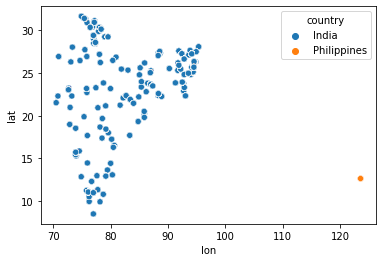

In [91]:
sns.scatterplot(x='lon',y='lat',hue='country',data=data)

<AxesSubplot:xlabel='lon', ylabel='lat'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


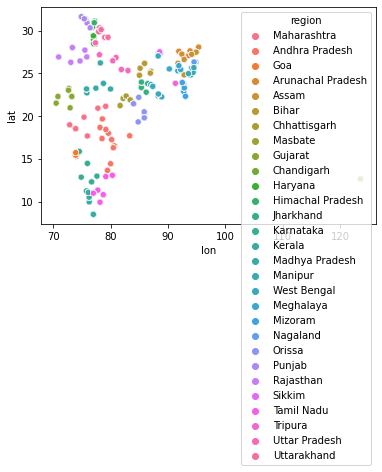

In [92]:
sns.scatterplot(x='lon',y='lat',hue='region',data=data)

# making data readable

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002944 entries, 0 to 2039807
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   moon_phase         object 
 1   moon_illumination  int64  
 2   city               object 
 3   temp_c             float64
 4   is_day             int64  
 5   condition          int64  
 6   wind_mph           float64
 7   wind_kph           float64
 8   wind_degree        int64  
 9   wind_dir           object 
 10  pressure_mb        float64
 11  precip_mm          float64
 12  humidity           int64  
 13  cloud              int64  
 14  feelslike_c        float64
 15  windchill_c        float64
 16  heatindex_c        float64
 17  dewpoint_c         float64
 18  will_it_rain       int64  
 19  vis_miles          float64
 20  gust_mph           float64
 21  region             object 
 22  country            object 
 23  lat                float64
 24  lon                float64
 25  sunrise_hour      

In [97]:
data.head(2)

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state_x,city,time,temp_c,...,chance_of_rain,vis_miles,gust_mph,state_y,region,country,lat,lon,tz_id,localtime
0,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,2021-10-15 00:00,23.2,...,0,6.0,8.9,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,2021-10-22 17:22
1,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati,2021-10-15 00:00,23.2,...,0,6.0,8.9,Andhra Pradesh,Maharashtra,India,20.93,77.75,Asia/Kolkata,2021-10-22 17:23


In [117]:
data['sunrise_hour'] = data['sunrise'].apply(lambda x: int(x.split()[0].split(':')[0]))
data['sunrise_minute'] = data['sunrise'].apply(lambda x: int(x.split()[0].split(':')[1]))

In [118]:
data['sunset_hour'] = data['sunset'].apply(lambda x: int(x.split()[0].split(':')[0]))
data['sunset_minute'] = data['sunset'].apply(lambda x: int(x.split()[0].split(':')[1]))

In [119]:
data['moonrise_hour'] = data['moonrise'].apply(lambda x: int(x.split()[0].split(':')[0]))
data['moonrise_minute'] = data['moonrise'].apply(lambda x: int(x.split()[0].split(':')[1]))

In [122]:
data['moonset'] = np.where(data['moonset'] == 'No moonset','00:00 PM', data['moonset'])

In [123]:
data['moonset_hour'] = data['moonset'].apply(lambda x: int(x.split()[0].split(':')[0]))
data['moonset_minute'] = data['moonset'].apply(lambda x: int(x.split()[0].split(':')[1]))

In [124]:
data.drop(['sunrise','sunset','moonrise','moonset'],1,inplace=True)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002944 entries, 0 to 2039807
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   moon_phase         object 
 1   moon_illumination  int64  
 2   city               object 
 3   temp_c             float64
 4   is_day             int64  
 5   condition          int64  
 6   wind_mph           float64
 7   wind_kph           float64
 8   wind_degree        int64  
 9   wind_dir           object 
 10  pressure_mb        float64
 11  precip_mm          float64
 12  humidity           int64  
 13  cloud              int64  
 14  feelslike_c        float64
 15  windchill_c        float64
 16  heatindex_c        float64
 17  dewpoint_c         float64
 18  will_it_rain       int64  
 19  vis_miles          float64
 20  gust_mph           float64
 21  region             object 
 22  country            object 
 23  lat                float64
 24  lon                float64
 25  sunrise_hour      

In [183]:
moon = pd.get_dummies(data['moon_phase'],drop_first=True)
data = pd.concat([data.drop('moon_phase',1),moon],axis=1)

In [185]:
data['city'].nunique()    

142

In [187]:
countries = pd.get_dummies('country',drop_first=True)
data = pd.concat([data.drop('country',1),countries],axis=1)

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002944 entries, 0 to 2039807
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   moon_illumination  int64  
 1   city               object 
 2   temp_c             float64
 3   is_day             int64  
 4   condition          int64  
 5   wind_mph           float64
 6   wind_kph           float64
 7   wind_degree        int64  
 8   wind_dir           object 
 9   pressure_mb        float64
 10  precip_mm          float64
 11  humidity           int64  
 12  cloud              int64  
 13  feelslike_c        float64
 14  windchill_c        float64
 15  heatindex_c        float64
 16  dewpoint_c         float64
 17  will_it_rain       int64  
 18  vis_miles          float64
 19  gust_mph           float64
 20  region             object 
 21  lat                float64
 22  lon                float64
 23  sunrise_hour       int64  
 24  sunrise_minute     int64  
 25  sunset_hour       

In [189]:
data['city'].nunique()

142

In [190]:
data['region'].nunique()

29

In [191]:
data.drop(['city','region'],1,inplace=True)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002944 entries, 0 to 2039807
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   moon_illumination  int64  
 1   temp_c             float64
 2   is_day             int64  
 3   condition          int64  
 4   wind_mph           float64
 5   wind_kph           float64
 6   wind_degree        int64  
 7   wind_dir           object 
 8   pressure_mb        float64
 9   precip_mm          float64
 10  humidity           int64  
 11  cloud              int64  
 12  feelslike_c        float64
 13  windchill_c        float64
 14  heatindex_c        float64
 15  dewpoint_c         float64
 16  will_it_rain       int64  
 17  vis_miles          float64
 18  gust_mph           float64
 19  lat                float64
 20  lon                float64
 21  sunrise_hour       int64  
 22  sunrise_minute     int64  
 23  sunset_hour        int64  
 24  sunset_minute      int64  
 25  moonrise_hour     

In [193]:
data['wind_dir'].nunique()

16

In [195]:
le=LabelEncoder()
data['wind_dir']=le.fit_transform(data['wind_dir'])

In [196]:
# model

In [233]:
X = data.drop('will_it_rain',1).values
y = data['will_it_rain'].values


In [234]:
from sklearn.model_selection import train_test_split

In [235]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [236]:
from sklearn.preprocessing import MinMaxScaler

In [237]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [238]:
X_test = scaler.transform(X_test)

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [240]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [241]:
data.shape[1]

31

In [265]:
model = Sequential()

model.add(Dense(31,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.3))
         
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='BinaryCrossentropy',optimizer='adam',)

In [266]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          epochs=20,batch_size=20,callbacks=[early_stop])

Epoch 1/20
70103/70103 [==============================] - 56s 787us/step - loss: 0.1107 - val_loss: 0.1000
Epoch 2/20
70103/70103 [==============================] - 54s 775us/step - loss: 0.0983 - val_loss: 0.0897
Epoch 3/20
70103/70103 [==============================] - 54s 774us/step - loss: 0.0964 - val_loss: 0.0880
Epoch 4/20
70103/70103 [==============================] - 54s 769us/step - loss: 0.0953 - val_loss: 0.0902
Epoch 5/20
70103/70103 [==============================] - 55s 783us/step - loss: 0.0943 - val_loss: 0.0875
Epoch 6/20
70103/70103 [==============================] - 55s 780us/step - loss: 0.0939 - val_loss: 0.0896
Epoch 7/20
70103/70103 [==============================] - 55s 781us/step - loss: 0.0931 - val_loss: 0.0878
Epoch 8/20
70103/70103 [==============================] - 55s 779us/step - loss: 0.0926 - val_loss: 0.0864
Epoch 9/20
70103/70103 [==============================] - 54s 775us/step - loss: 0.0923 - val_loss: 0.0889
Epoch 10/20
70103/70103 [============

In [267]:
loses = pd.DataFrame(model.history.history)

<AxesSubplot:>

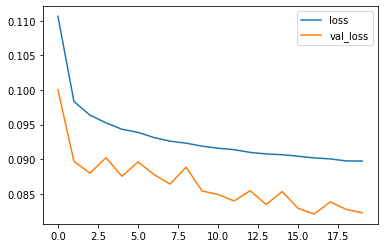

In [268]:
loses.plot()

In [269]:
from sklearn.metrics import confusion_matrix, classification_report

In [270]:
pred = model.predict_classes(X_test)
pred

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [271]:
pred =(model.predict(X_test) > 0.5).astype("int32")
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

<AxesSubplot:>

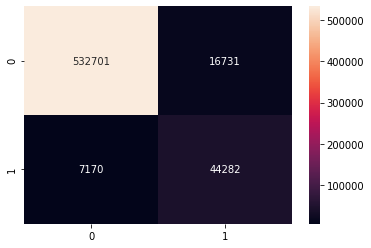

In [272]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='d')

In [273]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    549432
           1       0.73      0.86      0.79     51452

    accuracy                           0.96    600884
   macro avg       0.86      0.92      0.88    600884
weighted avg       0.96      0.96      0.96    600884

